# Analysis of Business, Sanitation and Crime Data
**CS109A Final Project**<br>
**Predicting Food Inspection Outcomes in Chicago**<br>
Calvin J Chiew, Angelo Kastroulis, Tim Hagmann<br>

In [ ]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Import libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Ploting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The data consists of 3 dataframes over the years from 2001 to 2016 about different businesses, crimerate and sanitation status in chicago. 

## Functions (necessary for the following calculations)

In [2]:
#--------  Scatter Plot
# A function that visualizes the data
# Input: 
#      x (variable on the x-axis)
#      y (variable on the y_axis)
#      df (panda data frame)
#      group (grouping variable, i.e., variable to plot)
#      col (vector of colors)
#      alpha (alpha value for colors)
#      size (size of the dots)
#      title (title of the plot)
#      marker (shape of the marker, default to 'o')
#      add_line (add a line plot)
#      linewidth (thinkness of the added line)
#      figsize (size of the figure)

def scatter_plot(x, y, df, group, col, alpha, size, title, marker='o', add_line=False, linewidth=1, figsize=(15, 10)):
    
    # Define plot
    fig = plt.figure(figsize = figsize)
    ax = plt.axes()

    # Extract unique categories
    cat = df[group].unique()

    # Loop trough categories
    for i in range(0, len(cat)) :
            ax.scatter(df[x][df[group] == cat[i]].values,
                       df[y][df[group] == cat[i]].values,
                       c=col[i], alpha=alpha, edgecolors="None", s=size,
                       label=cat[i],
                       marker=marker)
    # Add line plot
    if add_line:
            for i in range(0, len(cat)) :
                ax.plot(df[x][df[group] == cat[i]].values,
                           df[y][df[group] == cat[i]].values,
                           c=col[i], alpha=alpha, linewidth=linewidth)

    # Add legend, grid etc.
    ax.legend(loc=0, scatterpoints = 1) # Legend with just one dot
    ax.set_xlabel(x); ax.set_ylabel(y)
    ax.set_title(title)
    plt.grid()

In [15]:
#--------  Bar Plot
# A function to create a barplot
# Input: 
#      df (panda data frame)
#      var_name (name of the variable)
#      alpha (alpha value [0, 1])
#      title (title of the function)
#      color (color of the barplot)
#      edgecolor (cor of the outer barplotlines)
#      figsize (size of the figure)

def bar_plot(df, var_name, color='darkblue', alpha=0.6, title='', edgecolor='white', figsize=(18, 6)):
    
    ## Analyse crime types
    df['count'] = 1
    group = df.groupby(var_name)
    group = group.sum()
    group = group.sort_values('count', ascending=False)
    group = group['count']

    # Plot
    plt = group.plot(kind='bar', figsize=figsize, color=color, alpha=alpha, edgecolor=edgecolor, title=title)
    plt.grid()

## 1: Importing Data (Business)

In [3]:
# load csv file
df_business = pd.read_csv('data/Business_Licenses_-_Current_Active.csv')

## 2: Data Cleaning

In [4]:
# Transform column headers to lower case
df_business.columns = map(str.lower, df_business.columns)

# Replace whitespace in headers
df_business.columns = [x.strip().replace(' ', '_') for x in df_business.columns]

# Format to datetime string
df_business['license_term_start_date'] =  pd.to_datetime(df_business['license_term_start_date'], format='%m/%d/%Y')
df_business['license_term_expiration_date'] =  pd.to_datetime(df_business['license_term_expiration_date'], format='%m/%d/%Y')
df_business['license_approved_for_issuance'] =  pd.to_datetime(df_business['license_approved_for_issuance'], format='%m/%d/%Y')
df_business['date_issued'] =  pd.to_datetime(df_business['date_issued'], format='%m/%d/%Y')

# Filter
df_business = df_business[~((df_business['application_type'] == 'C_CAPA') | (df_business['application_type'] == 'C_SBA'))]

# Exclude NA's
df_business = df_business[~pd.isnull(df_business['license_term_start_date'])]
df_business = df_business[~pd.isnull(df_business['license_term_expiration_date'])]


## 3. Data Exploration

In [28]:
print "Shape of the data: ", df_business.shape

# View first few rows
df_business.head()

Shape of the data:  (63524, 34)


,﻿id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_term_start_date,license_term_expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,2016-05-16,2018-05-15,2016-05-18,2016-08-30,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
1,2488345-20160830,2488345,409564,1,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",5722 S WOOD ST 1ST,CHICAGO,IL,60636,...,2016-08-30,2018-09-15,2016-08-30,2016-08-30,AAI,NaN,NaN,41.789617,-87.669472,"(41.78961679000226, -87.66947199630827)"
2,2279620-20160830,2279620,305598,17,"PREFER VALET PARKING SERVICE, INC.","PREFER VALET PARKING SERVICES, INC.",2812-2840 W 26TH ST GROUND,CHICAGO,IL,60623,...,2016-08-30,2018-03-15,2016-08-30,2016-08-30,AAI,NaN,25.0,41.844792,-87.695742,"(41.84479183618235, -87.69574196647987)"
3,2354707-20160916,2482568,393149,1,ANGELINE R. MC CARTHY,ANGELINE R. MC CARTHY,17707 S HARLEM ST 1,TINLEY PARK,IL,60477,...,2016-09-16,2018-09-15,NaT,2016-08-30,AAI,NaN,NaN,NaN,NaN,NaN
4,1677226-20151116,2426071,300195,1,"CORNERSTONE CAFE', INC.",CORNERSTONE CAFE,2753 N WESTERN AVE,CHICAGO,IL,60647,...,2015-11-16,2017-11-15,2015-11-09,2015-11-10,AAI,NaN,NaN,41.931968,-87.687741,"(41.93196806631448, -87.6877412495)"


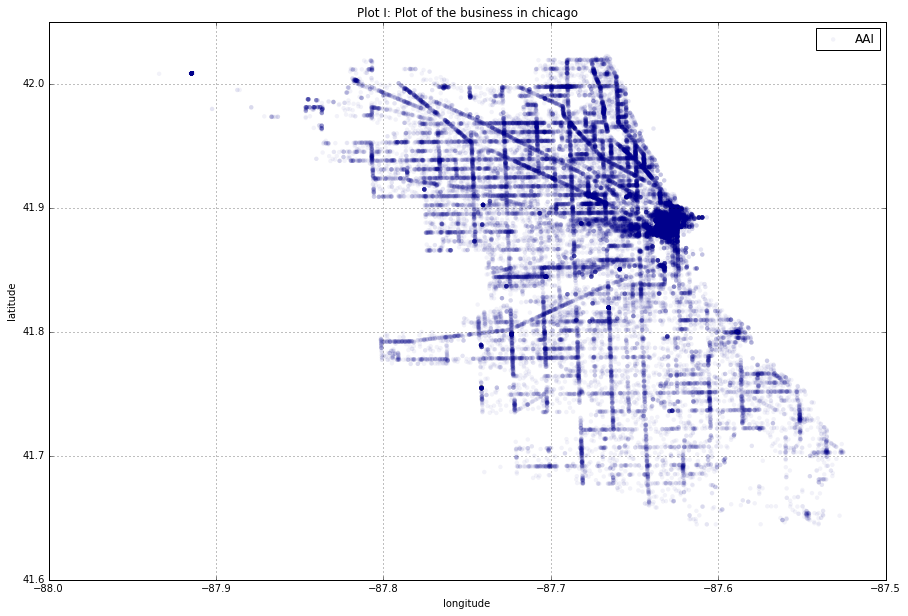

In [6]:
# Plot the data
col = ["darkblue", "darkred", "black"]
scatter_plot(x='longitude', y='latitude', df=df_business, group='license_status',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot I: Plot of the business in chicago")

In [7]:
df_business['license_description'].unique()

array(['Limited Business License', 'Regulated Business License',
       'Public Garage', 'Peddler License', 'Retail Food Establishment',
       'Manufacturing Establishments', 'Animal Care License',
       'Motor Vehicle Services License', 'Tavern', 'Package Goods',
       'Raffles', 'Tobacco Retail Over Counter',
       'Consumption on Premises - Incidental Activity',
       "Caterer's Liquor License", 'Late Hour', 'Outdoor Patio',
       'Public Place of Amusement', 'Valet Parking Operator',
       'Accessory Garage', 'Food - Shared Kitchen Long-Term User',
       'Mobile Food License', "Children's Services Facility License",
       'Heliports', 'Special Event Food', 'Wholesale Food Establishment',
       'Filling Station', 'Pawnbroker', 'Bicycle Messenger Service',
       'Music and Dance', 'Secondhand Dealer (Includes Valuable Objects)',
       'Food - Shared Kitchen Short-Term User', 'Massage Establishment',
       'Tobacco Sampler', 'Secondhand Dealer (No Valuable Objects)',
    

## 1: Importing Data (Crimes)

In [8]:
# load csv file
df_crimes = pd.read_csv('data/Crimes_-_2001_to_present.csv')

## 2: Data Cleaning

In [9]:
# Transform column headers to lower case
df_crimes.columns = map(str.lower, df_crimes.columns)

# Replace whitespace in headers
df_crimes.columns = [x.strip().replace(' ', '_') for x in df_crimes.columns]

In [26]:
df_crimes_2015 = df_crimes[df_crimes['year'] == 2015]
df_crimes_2015.head()

# Exclude NA's
df_crimes_2015 = df_crimes_2015[~pd.isnull(df_crimes_2015['latitude'])]


## 3. Data Exploration

In [29]:
print "Shape of the data: ", df_crimes_2015.shape

# View first few rows
df_crimes_2015.head()

Shape of the data:  (259817, 22)


,﻿id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
1665762,9911261,HY100213,01/01/2015 03:02:00 AM,045XX W WELLINGTON AVE,0453,BATTERY,AGGRAVATED PO: OTHER DANG WEAP,STREET,True,True,...,31.0,20.0,04B,1145740.0,1919563.0,2015,02/04/2016 06:33:39 AM,41.935275,-87.739813,"(41.935274834, -87.739813321)"
1665852,9911589,HY100738,01/01/2015 12:30:00 AM,020XX W MELROSE ST,0880,THEFT,PURSE-SNATCHING,APARTMENT,False,False,...,32.0,5.0,06,1162168.0,1921577.0,2015,02/04/2016 06:33:39 AM,41.940473,-87.679383,"(41.94047341, -87.67938308)"
1668072,10336943,HY528149,12/05/2015 08:00:00 PM,025XX W ADDISON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESTAURANT,True,False,...,47.0,5.0,11,1159059.0,1923833.0,2015,02/04/2016 06:53:43 AM,41.946729,-87.690748,"(41.946728528, -87.690747572)"
1668690,10402279,HZ138747,12/16/2015 12:01:00 AM,006XX W FULTON ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,42.0,28.0,06,1172070.0,1902098.0,2015,04/15/2016 03:49:27 PM,41.886809,-87.643566,"(41.886809001, -87.643565821)"
1668691,10402352,HZ138755,12/09/2015 08:00:00 AM,031XX N BROADWAY,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,COMMERCIAL / BUSINESS OFFICE,False,False,...,44.0,6.0,11,1171708.0,1920869.0,2015,04/15/2016 03:49:27 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


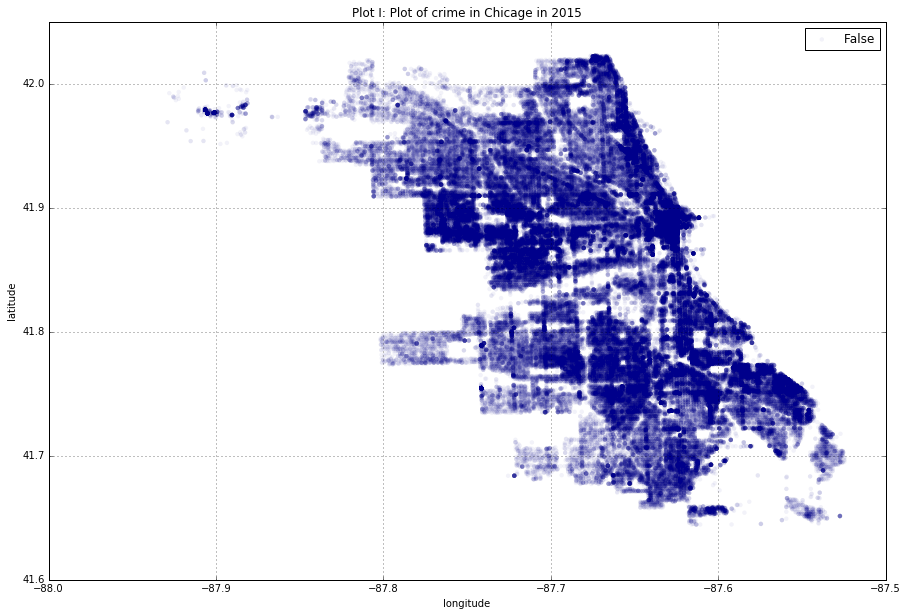

In [12]:
# Plot the data
col = ["darkblue", "darkred"]
scatter_plot(x='longitude', y='latitude', df=df_crimes_2015[df_crimes_2015['arrest'] == False], group='arrest',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot I: Plot of crime in Chicage in 2015")


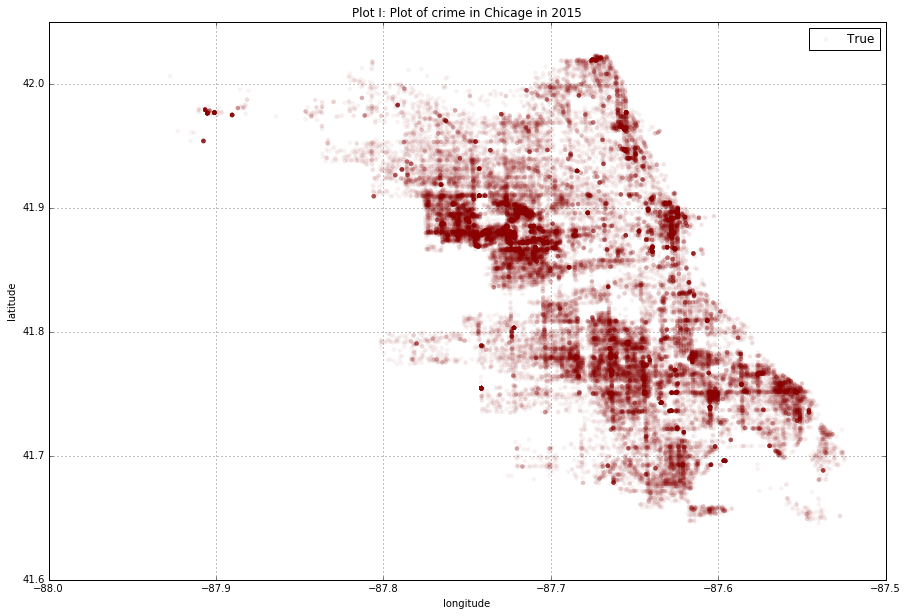

In [13]:
# Plot the data
col = ["darkred", "darkblue"]
scatter_plot(x='longitude', y='latitude', df=df_crimes_2015[df_crimes_2015['arrest'] == True], group='arrest',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot I: Plot of crime in Chicage in 2015")


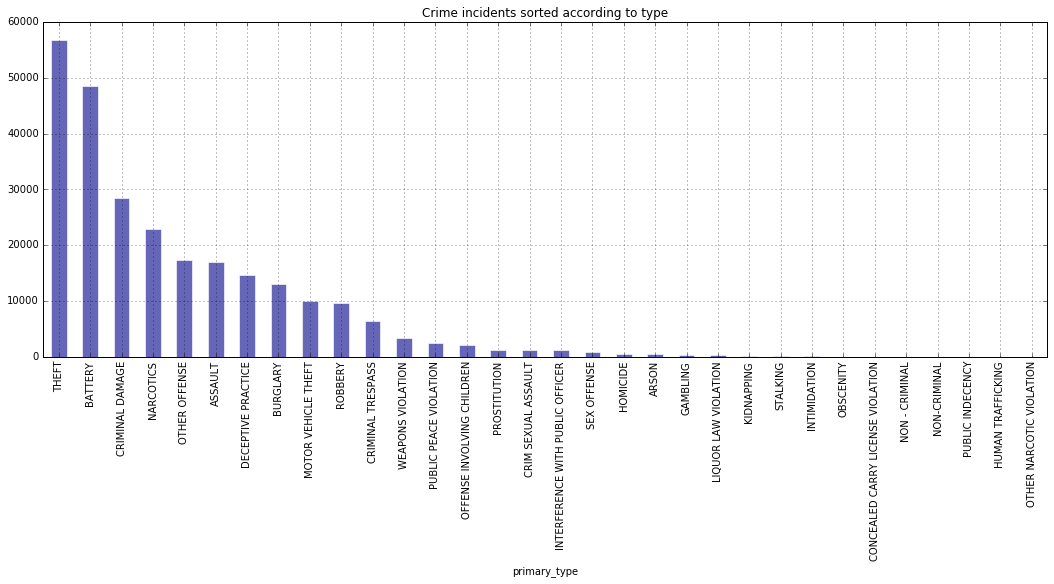

In [16]:
bar_plot(df=df_crimes_2015, var_name='primary_type', color='darkblue', alpha=0.6,
         title='Crime incidents sorted according to type', edgecolor='white', figsize=(18, 6))

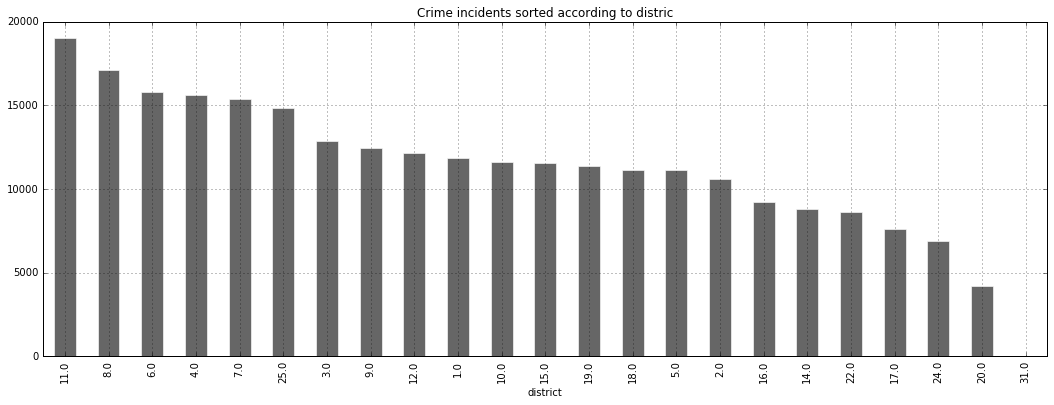

In [17]:
bar_plot(df=df_crimes_2015, var_name='district', color='black', alpha=0.6,
         title='Crime incidents sorted according to distric', edgecolor='white', figsize=(18, 6))

## 1: Importing Data (Sanitation)

In [30]:
# load csv file
df_sanitation = pd.read_csv('data/311_Service_Requests_-_Sanitation_Code_Complaints.csv')

## 2: Data Cleaning

In [31]:
# Remove first row
df_sanitation = df_sanitation[1:len(df_sanitation)]

# Transform column headers to lower case
df_sanitation.columns = map(str.lower, df_sanitation.columns)

# Replace whitespace in headers
df_sanitation.columns = [x.strip().replace(' ', '_') for x in df_sanitation.columns]

# Format to datetime string
df_sanitation['creation_date'] =  pd.to_datetime(df_sanitation['creation_date'], format='%m/%d/%Y')
df_sanitation['completion_date'] =  pd.to_datetime(df_sanitation['completion_date'], format='%m/%d/%Y')

# Exclude NA's
df_sanitation = df_sanitation[~pd.isnull(df_sanitation['latitude'])]

## 3. Data Exploration

In [32]:
print "Shape of the data: ", df_sanitation.shape

# View first few rows
df_sanitation.head()

Shape of the data:  (112597, 16)


,creation_date,status,completion_date,service_request_number,type_of_service_request,what_is_the_nature_of_this_code_violation?,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,location
1,2011-01-01,Completed,2011-01-03,11-00001271,Sanitation Code Violation,Garbage in alley,3731 N KIMBALL AVE,60618.0,1.153055e+06,1.924737e+06,35.0,17.0,16.0,41.949330,-87.712791,"(41.949330379708314, -87.71279114200225)"
2,2011-01-01,Completed,2011-01-03,11-00001278,Sanitation Code Violation,Garbage in yard,3036 N SAWYER AVE,60618.0,1.154187e+06,1.920017e+06,35.0,14.0,21.0,41.936356,-87.708757,"(41.93635566035826, -87.70875735748406)"
3,2011-01-01,Completed,2011-01-03,11-00001696,Sanitation Code Violation,Construction Site Cleanliness/Fence,600 N CLARK ST,60654.0,1.175435e+06,1.904173e+06,42.0,18.0,8.0,41.892427,-87.631146,"(41.892427342273194, -87.6311463966443)"
4,2011-01-01,Completed,2011-01-03,11-00002161,Sanitation Code Violation,Garbage in alley,10047 S FOREST AVE,60628.0,1.180021e+06,1.838415e+06,9.0,5.0,49.0,41.711877,-87.616318,"(41.711877328148155, -87.61631763072438)"
5,2011-01-01,Completed,2011-01-03,11-00002373,Sanitation Code Violation,Garbage in yard,10648 S AVENUE B,60617.0,1.204784e+06,1.834964e+06,10.0,4.0,52.0,41.701807,-87.525750,"(41.70180714214017, -87.52574964355905)"


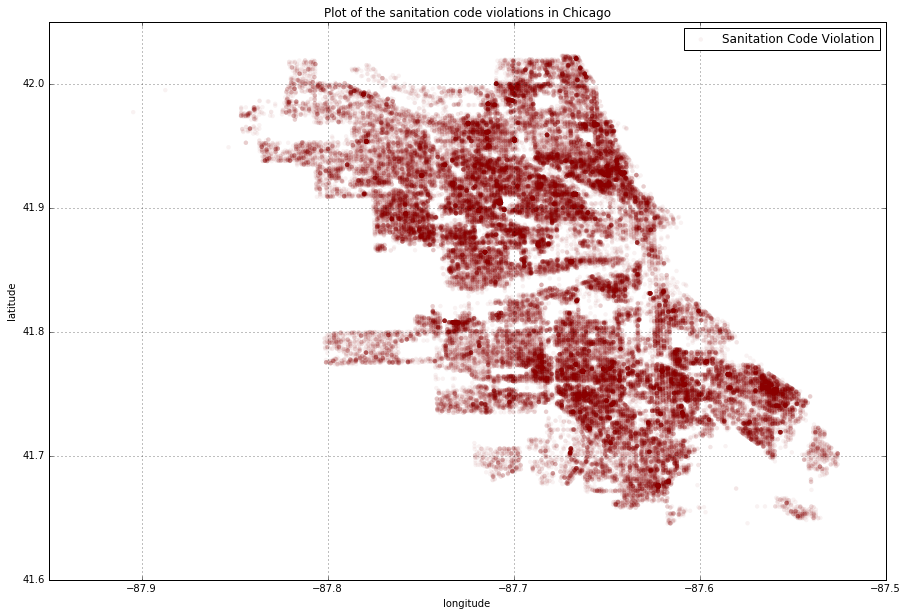

In [21]:
# Plot the data
col = ["darkred", "darkblue"]
scatter_plot(x='longitude', y='latitude', df=df_sanitation, group='type_of_service_request',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot of the sanitation code violations in Chicago")


In [33]:
df_sanitation.columns

Index([u'creation_date', u'status', u'completion_date',
       u'service_request_number', u'type_of_service_request',
       u'what_is_the_nature_of_this_code_violation?', u'street_address',
       u'zip_code', u'x_coordinate', u'y_coordinate', u'ward',
       u'police_district', u'community_area', u'latitude', u'longitude',
       u'location'],
      dtype='object')

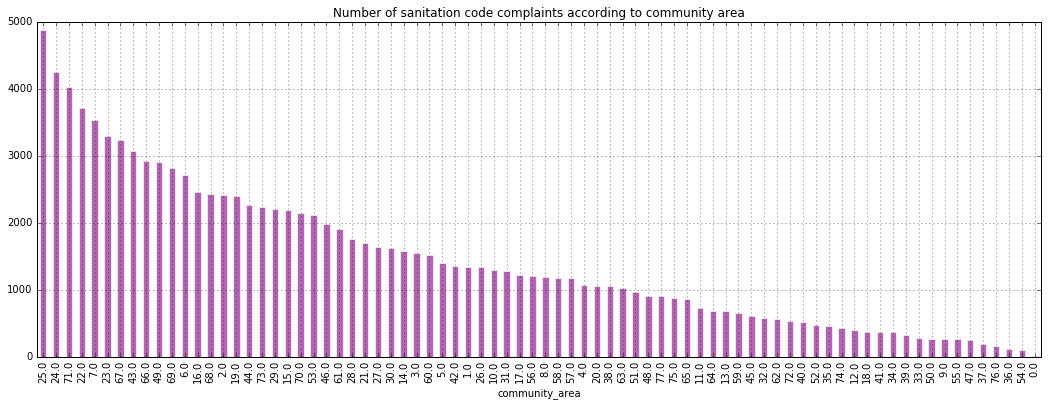

In [35]:
bar_plot(df=df_sanitation, var_name='community_area', color='purple', alpha=0.6,
         title='Number of sanitation code complaints according to community area', edgecolor='white', figsize=(18, 6))

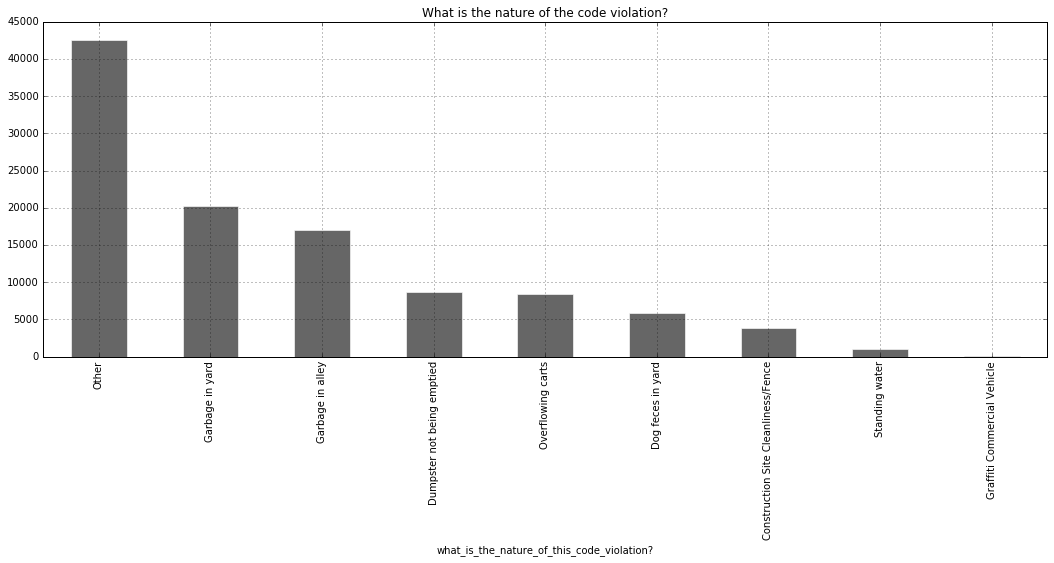

In [37]:
bar_plot(df=df_sanitation, var_name='what_is_the_nature_of_this_code_violation?', color='black', alpha=0.6,
         title='What is the nature of the code violation?', edgecolor='white', figsize=(18, 6))